<a href="https://colab.research.google.com/github/Khairnazfa/Khairnazfa/blob/main/Telco_Churn_Prediction_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction 📱

In [ ]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import graphviz


# Obtaining the Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/telco_customer_churn_dataset.csv')

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1688,4735-BJKOU,Female,0,No,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,804.85,No
230,2651-ZCBXV,Male,0,No,No,54,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.00,5760.65,No
5682,3841-CONLJ,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,35.00,35,No
4255,2157-MXBJS,Male,0,Yes,No,13,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Mailed check,75.30,989.45,Yes
6316,8946-BFWSG,Male,0,Yes,Yes,63,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,No


# Scrubbing the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert TotalCharges datatype from object to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df2 = df.copy()

In [ ]:
df2['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Converting binary strings to integers

binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_columns:
    df2[column] = df2[column].map({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df2['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
# Grouping up similar data

df2['MultipleLines'] = df2['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})

In [ ]:
df2['MultipleLines'].unique()

array([0, 1])

In [ ]:
# Repeating with other columns

print(df2['OnlineSecurity'].unique())
print(df2['OnlineBackup'].unique())
print(df2['DeviceProtection'].unique())
print(df2['TechSupport'].unique())
print(df2['StreamingTV'].unique())
print(df2['StreamingMovies'].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [ ]:
df2['OnlineSecurity'] = df2['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
df2['OnlineBackup'] = df2['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
df2['DeviceProtection'] = df2['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
df2['TechSupport'] = df2['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
df2['StreamingTV'] = df2['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
df2['StreamingMovies'] = df2['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 0})

In [ ]:
# Re-check

print(df2['OnlineSecurity'].unique())
print(df2['OnlineBackup'].unique())
print(df2['DeviceProtection'].unique())
print(df2['TechSupport'].unique())
print(df2['StreamingTV'].unique())
print(df2['StreamingMovies'].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]


In [ ]:
# Other categorical data

print(df2['InternetService'].unique())
print(df2['Contract'].unique())
print(df2['PaymentMethod'].unique())

['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# Split InternetService, Contract and PaymentMethod columns

df2 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df2.isnull().sum()

customerID                                  0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month           

Notice that TotalCharges column has 11 missing values out of 7043 (0.15%), so our prediction will still be fine if we drop the rows.

In [ ]:
# Removing rows with null values

df2.dropna(inplace=True)
df2;

In [ ]:
df2.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_O

All null data are removed

In [ ]:
# Dropping Customer ID

df2.drop(columns=['customerID'], inplace=True)

In [ ]:
from google.colab import files
df.to_csv('filename.csv')
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploring the Data

In [ ]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Findings

* TotalCharges - significant difference between 75% percentile and max: 3794.74 and 8684.8 (outlier?)
* TotalCharges - on average customers have total charge of 2283.3 
* MonthlyCharges - on average customers pay 64.79 monthly
* Tenure - on average customers stay for 32.4 months



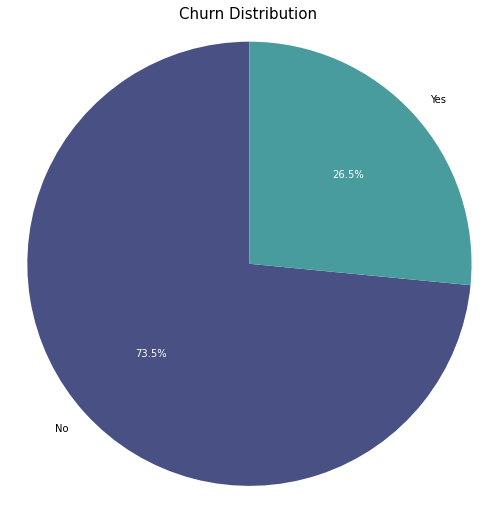

In [ ]:
# Pie Chart

plt.figure(figsize=(7,7))

#colors
colors = ['#495084', '#499c9e']

df3 = pd.DataFrame(df['Churn'].value_counts().reset_index())
patches, texts, autotexts = plt.pie(data=df3, x='Churn', labels='index', colors = colors, autopct='%1.1f%%', startangle=90)

for autotext in autotexts:
    autotext.set_color('white')

# Equal aspect ratio ensures that pie is drawn as a circle

plt.axis('equal')  
plt.tight_layout()
plt.title('Churn Distribution', fontsize=15)
plt.show()

We can see there is an imbalance data and this needs to be treated for our machine learning model later.

**Relationship with categorical values:**

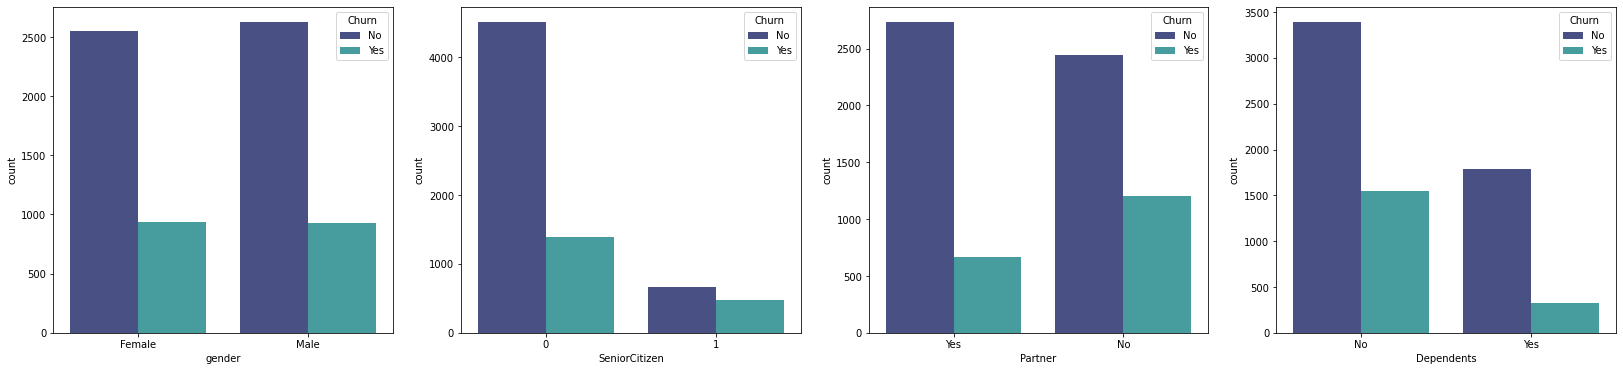

In [ ]:
main, subplots = plt.subplots(1, 4, figsize=(28,6))
sns.countplot(data=df, x='gender', hue='Churn', palette='mako', ax=subplots[0])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='mako', ax=subplots[1])
sns.countplot(data=df, x='Partner', hue='Churn', palette='mako', ax=subplots[2])
sns.countplot(data=df, x='Dependents', hue='Churn', palette='mako', ax=subplots[3])

* There is an equal churn rate regardless of gender.
* Higher churn rate among senior citizens
* Higher churn rate if customer has no partner or dependents



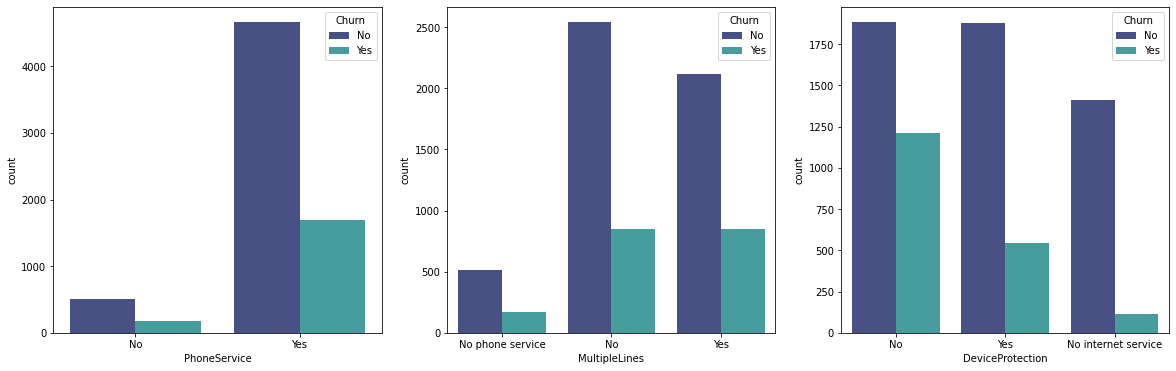

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(20,6))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='mako', ax=subplots[0])
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='mako', ax=subplots[1])
sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='mako', ax=subplots[2])

* Higher counts for churn if customer subscribed to phone service
* Higher churn rate if customer did not sign up for device protection



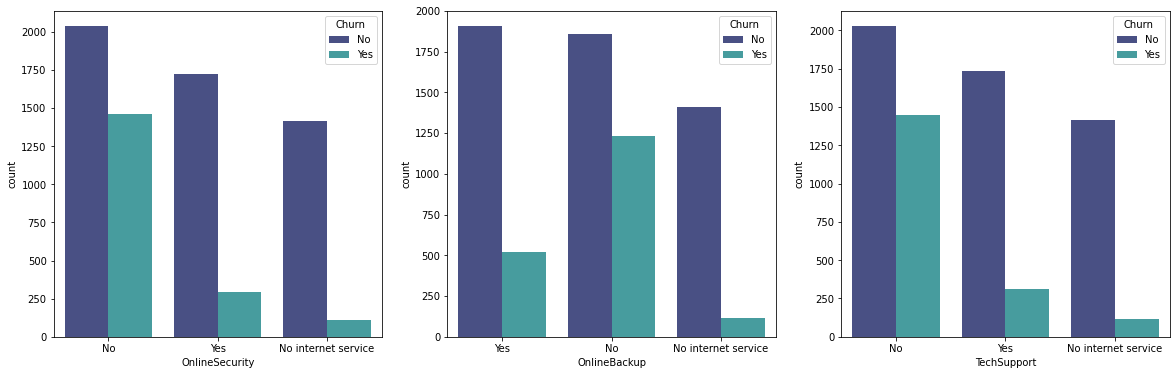

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(20,6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='mako', ax=subplots[0])
sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='mako', ax=subplots[1])
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='mako', ax=subplots[2])

* Higher churn rate if customer has did not sign up for online security and backup
* Higher churn rate if customer has no tech support

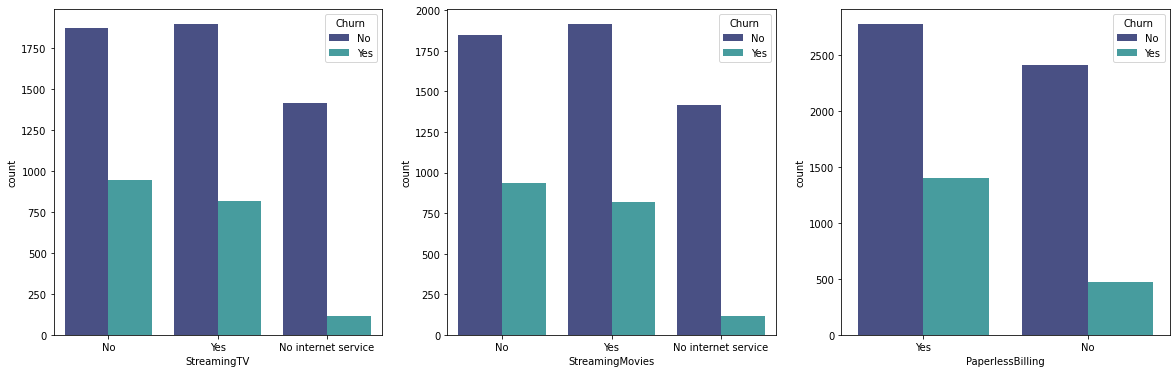

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(20,6))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='mako', ax=subplots[0])
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='mako', ax=subplots[1])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='mako', ax=subplots[2])

* About equal churn rate for customers with streaming TV and streaming movies
* Customers subscribed with paperless billing has higher churn rate





(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

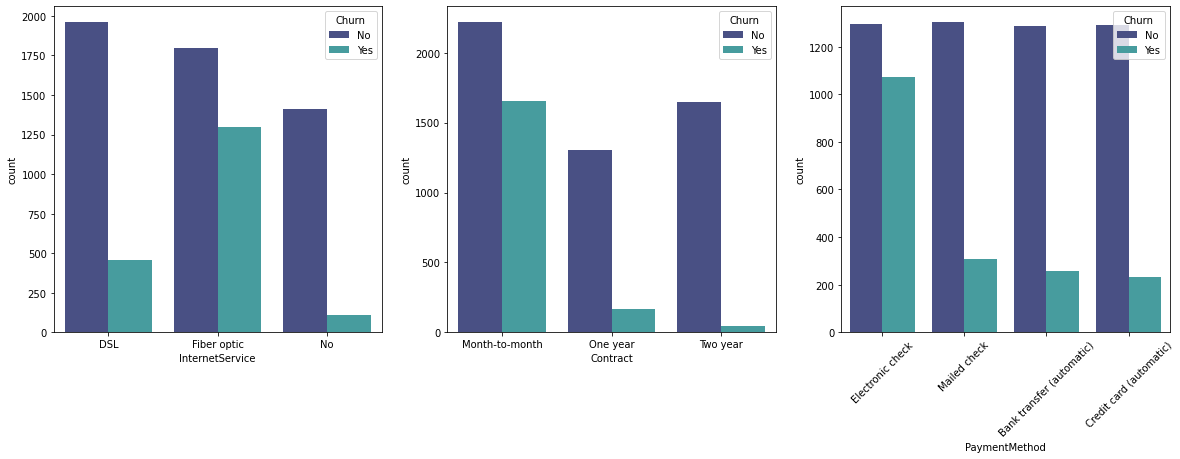

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(20,6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='mako', ax=subplots[0])
sns.countplot(data=df, x='Contract', hue='Churn', palette='mako', ax=subplots[1])
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='mako', ax=subplots[2])
plt.xticks(rotation=45)

**Distribution among tenure, Monthly Charges and Total Charges:**

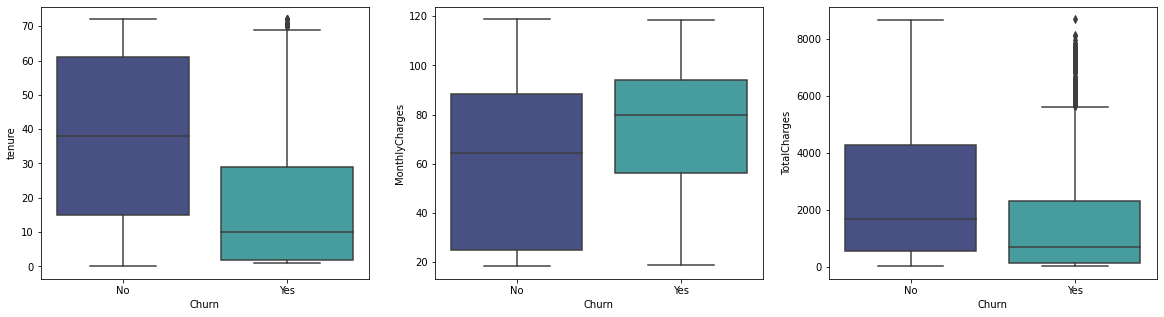

In [ ]:
main, subplots = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='mako', ax=subplots[0])
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='mako', ax=subplots[1])
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='mako', ax=subplots[2])

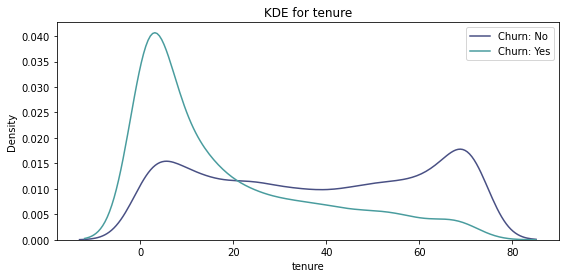

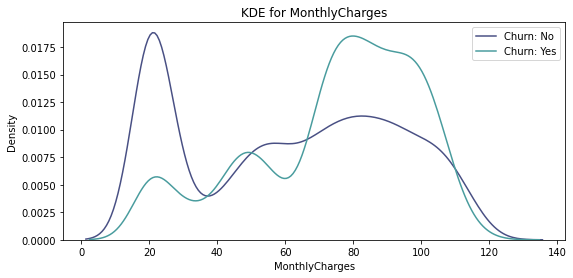

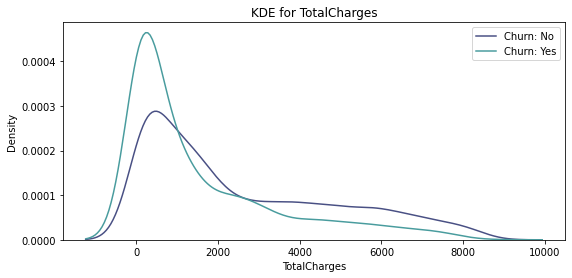

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= '#495084', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= '#499c9e', label= 'Churn: Yes')
    plt.legend()
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From plots, customers who churn have higher average monthly charges.

Customers also tend to churn around 10 months of their tenure (average), so the lower tenure also means there are lesser total charges for them.

**Relationship between tenure and likeliness to churn:**

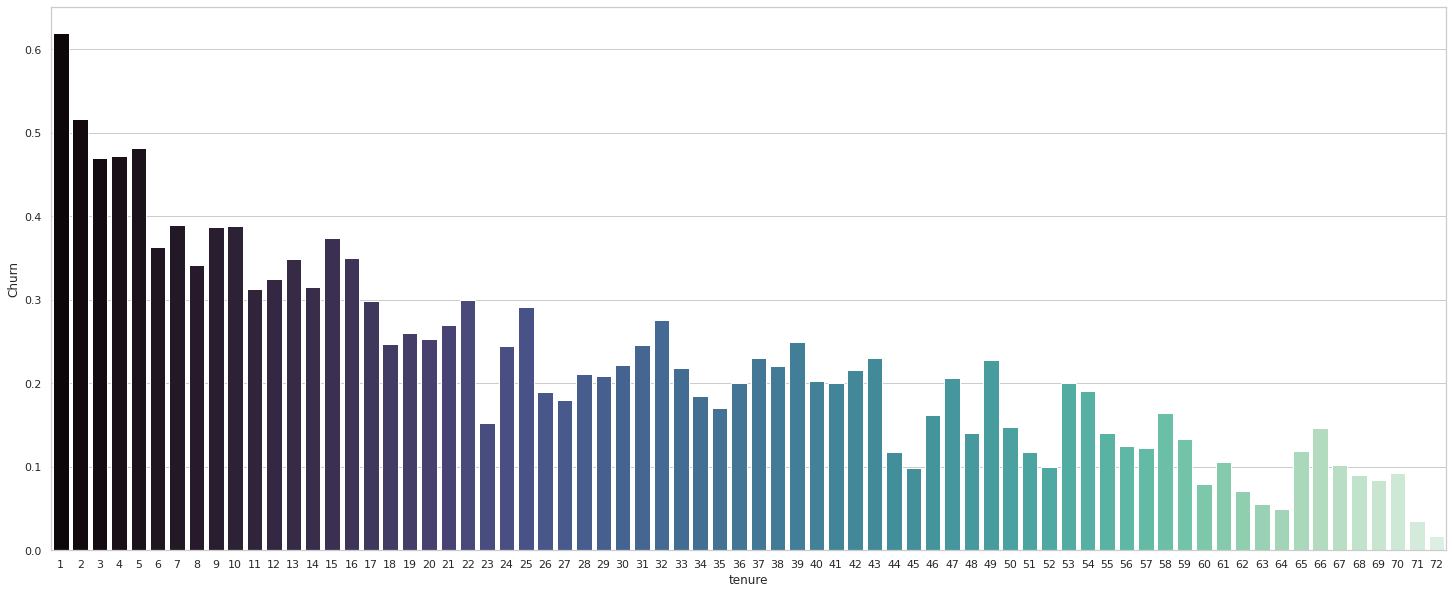

In [ ]:
sns.set(style="whitegrid", rc={'figure.figsize':(25,10)})
sns.barplot(x='tenure', y='Churn', data=df2, palette='mako', ci=None)

**Correlations:**

In [ ]:
# Correlation Matrix

corr = df2.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


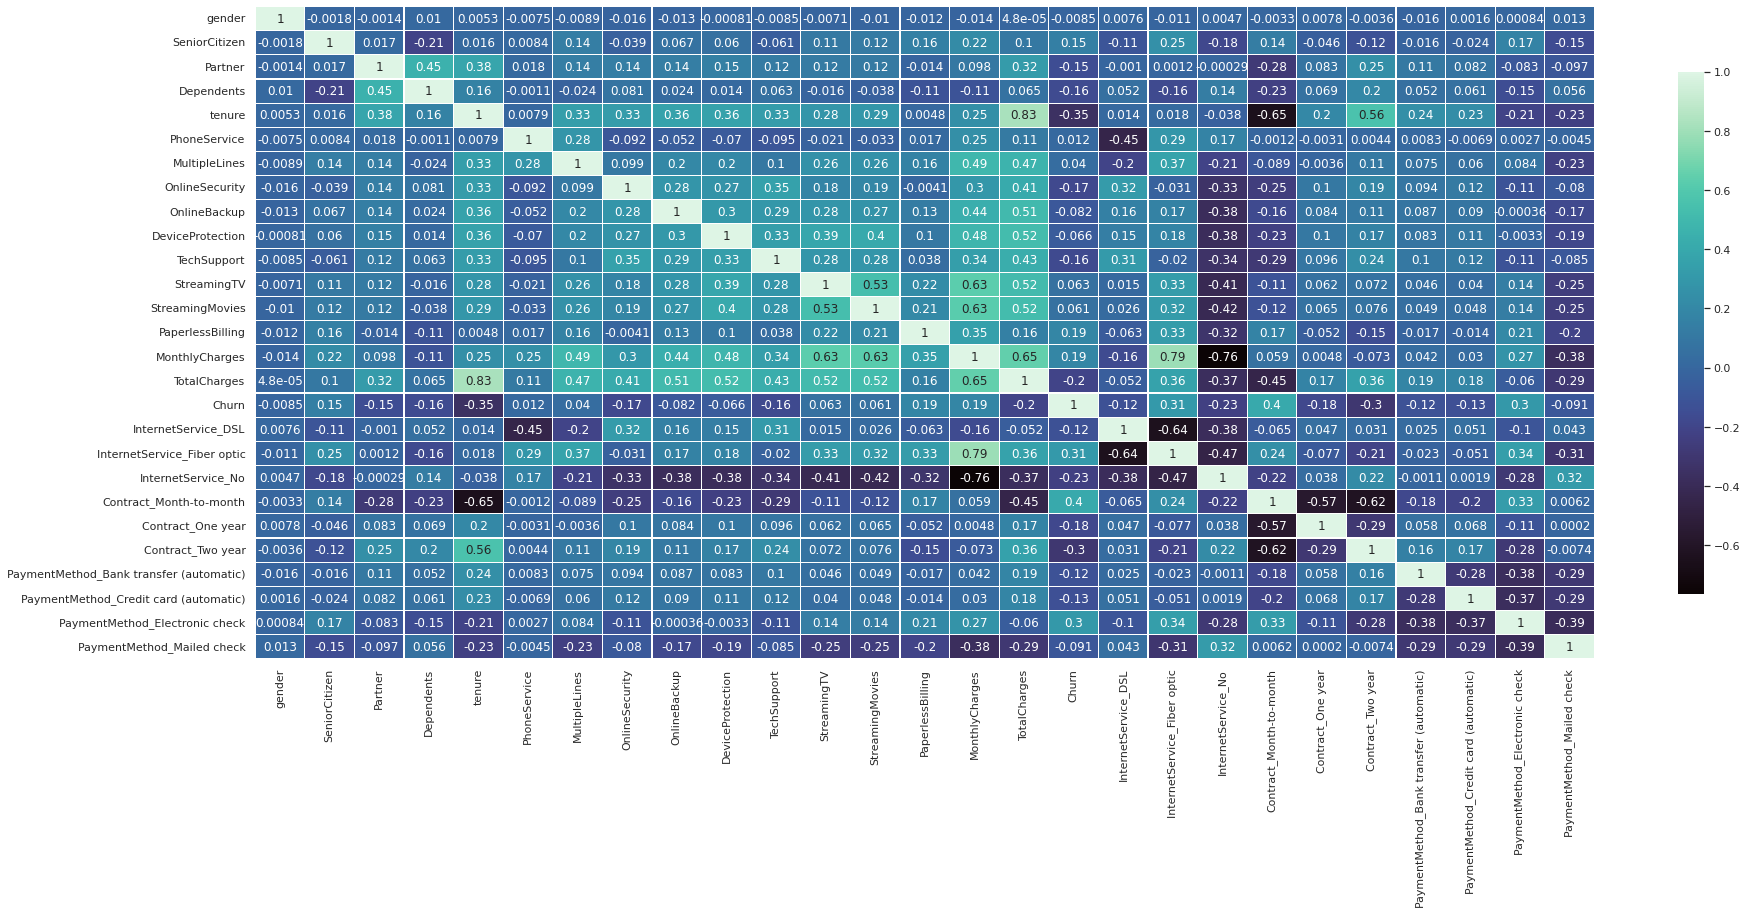

In [ ]:
# Correlation Heatmap

sns.set(style="whitegrid", rc={'figure.figsize':(30,12)})
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(corr, cmap='mako', linewidths=0.1, cbar_kws={"shrink":.8}, annot=True)

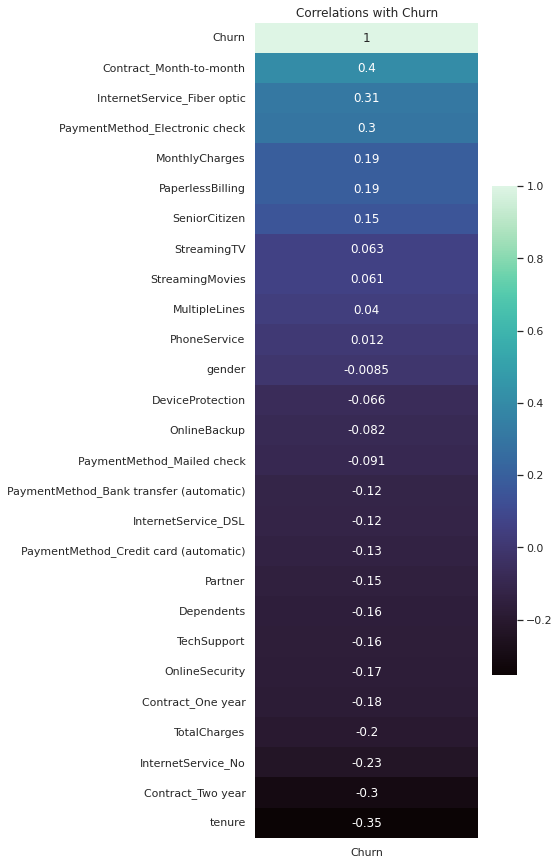

In [ ]:
plt.figure(figsize=(5,15))
heatmap = sns.heatmap(df2.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='mako', cbar_kws={"shrink":.6})
plt.title('Correlations with Churn')
plt.show()

**Insights from the heatmap:**

Variables that are most correlated to Churn 

Positive correlations:
1. Contract_Month-to-month (+0.4)
2. InternetService_Fiber optic (+0.31)
3. PaymentMethod_Electronic check (+0.3)
4. MonthlyCharges (+0.19)
5. PaperlessBilling (+0.19)
6. SeniorCitizen (+0.15)

Negative correlations:
1. tenure (-0.35)
2. Contract_Two year (-0.3) Contract_One year (-0.18)
3. InternetService_No (-0.23)
4. TotalCharges (-0.2)
5. Contract_One year (-0.18)
6. OnlineSecurity (-0.17)
7. Dependents (-0.16)
8. Partner (-0.15)

From observations, we can see that the higher the tenure (number of months the customer stay with the company), the lower the likeliness to churn. In other words higher tenure = customers are more loyal to the company.

Maybe have better benefits? reward/points system?

# Modelling the Data

# Feature selection to improve model accuracy

**Univariate Selection**

ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df2.drop(['Churn'], axis=1)  #independent columns
y = df2['Churn']    #target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print 10 best features

                             Specs          Score
15                    TotalCharges  629630.810349
4                           tenure   16377.328093
14                  MonthlyCharges    3653.074681
19         Contract_Month-to-month     516.714004
21               Contract_Two year     486.223101
24  PaymentMethod_Electronic check     424.113152
17     InternetService_Fiber optic     372.082851
18              InternetService_No     285.475152
20               Contract_One year     176.608724
7                   OnlineSecurity     147.165601


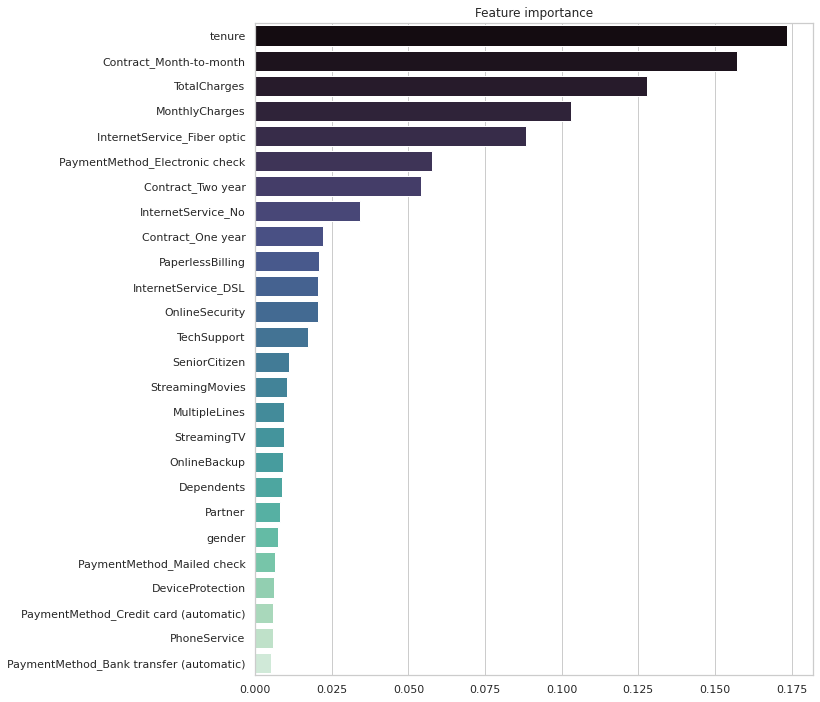

In [ ]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Drop redundant columns (for features with two unique values)

X = df2.drop(['Churn'], axis=1)
y = df2['Churn'] 

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="mako", orient='h')

In [ ]:
columns = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 
            'InternetService_No', 'Contract_One year', 'PaperlessBilling']

X = df2[columns] # x (other variables/features)
y = df2['Churn'] # y (target variable)

# Splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Model for accuracy prediction

model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predict accuracy

y_pred = model.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1: {metrics.f1_score(y_test, y_pred):.4f}")

Accuracy: 0.7976
Precision: 0.7000
Recall: 0.4036
F1: 0.5120


## Treating imbalanced data and re-modelling

**Treating imbalanced data with undersampling:**

In [ ]:
columns = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 
            'InternetService_No', 'Contract_One year', 'PaperlessBilling']

X = df2[columns] # x (other variables/features)
y = df2['Churn'] # y (target variable)

# Splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [ ]:
print("Before undersampling: ",Counter(y_train))
print("After undersampling: ",Counter(y_under))

Before undersampling:  Counter({0: 3608, 1: 1314})
After undersampling:  Counter({0: 1314, 1: 1314})


In [ ]:
# Model for accuracy prediction

model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(X_under, y_under)

# Predict accuracy

y_pred = model.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1: {metrics.f1_score(y_test, y_pred):.4f}")

Accuracy: 0.7536
Precision: 0.5218
Recall: 0.7550
F1: 0.6171


**Treating imbalanced data with SMOTE (oversampling):**



In [ ]:
columns = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 
            'InternetService_No', 'Contract_One year', 'PaperlessBilling']

X = df2[columns] # x (other variables/features)
y = df2['Churn'] # y (target variable)

# Splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_res))

Before oversampling:  Counter({0: 3608, 1: 1314})
After oversampling:  Counter({0: 3608, 1: 3608})


In [ ]:
# Model for accuracy prediction

model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(X_res, y_res)

# Evaluation scores

y_pred = model.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1: {metrics.f1_score(y_test, y_pred):.4f}")

Accuracy: 0.7744
Precision: 0.5573
Recall: 0.6919
F1: 0.6174


In [ ]:
target_names = ['Not Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Not Churn       0.88      0.80      0.84      1555
       Churn       0.56      0.69      0.62       555

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.79      0.77      0.78      2110



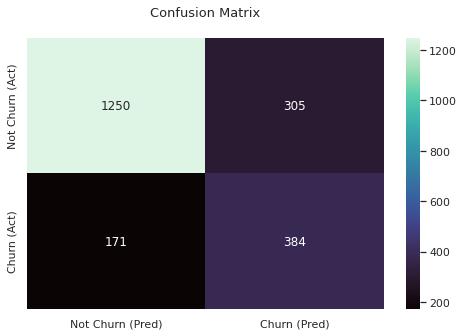

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='mako', fmt='d', xticklabels = ['Not Churn (Pred)', 'Churn (Pred)'], yticklabels = ['Not Churn (Act)', 'Churn (Act)'])
plt.title('Confusion Matrix\n', fontsize=13)
plt.show()

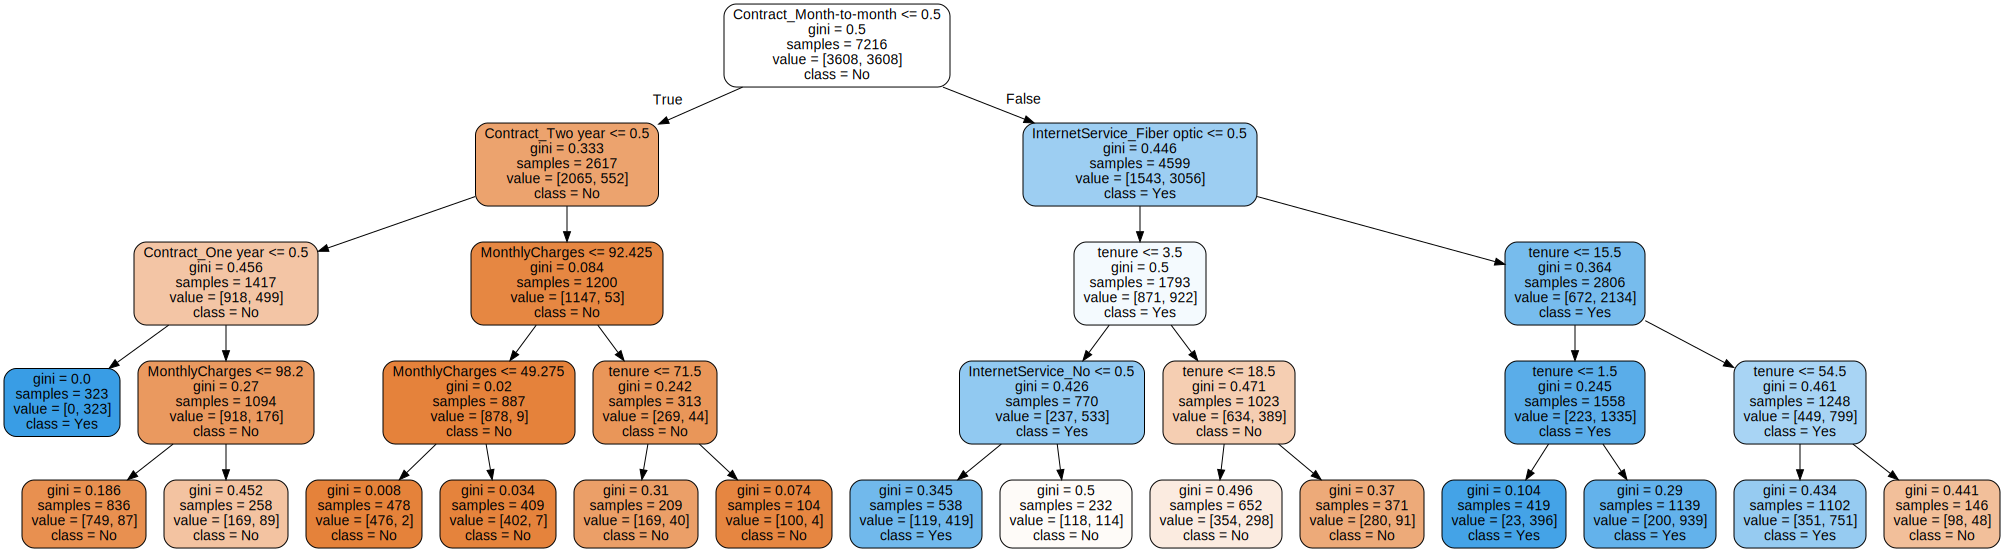

In [ ]:
columns = list(X.columns)
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph